## Dataset Reading and Visulization

In [1]:
from mlxtend.data import loadlocal_mnist # library to load ubyte files
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
import pandas as pd

In [43]:
from typing import Tuple, Callable
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import regularizers
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
from keras.engine.training import Model
import functools
import os
import numpy as np

In [3]:
# loading train and test dataset
X_train, y_train = loadlocal_mnist(images_path='Dataset/train-images.idx3-ubyte',labels_path='Dataset/train-labels.idx1-ubyte')
X_test, y_test = loadlocal_mnist(images_path='Dataset/t10k-images.idx3-ubyte',labels_path='Dataset/t10k-labels.idx1-ubyte')
num_classes=len(np.unique(y_train))

Mnist Handwritten dataset consists of 60000 training images of digits and 10000 testing images. The dataset consists of 28*28 gray scale images.

In [4]:
print('Training Dataset shape:',X_train.shape)
print('Training labels shape:',y_train.shape)

print('Testing Dataset shape:',X_test.shape)
print('Testing labels shape:',y_test.shape)

print('Unique Labels:',np.unique(y_train))

Training Dataset shape: (60000, 784)
Training labels shape: (60000,)
Testing Dataset shape: (10000, 784)
Testing labels shape: (10000,)
Unique Labels: [0 1 2 3 4 5 6 7 8 9]


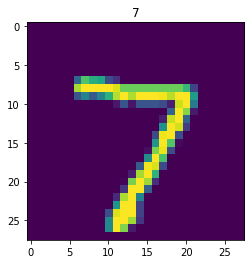

In [5]:
# Visulizing Dataset one example.
plt.imshow(X_test[0].reshape(28,28))
plt.title(y_test[0]);

Visualizing first 40 images from training dataset and their labels. Its shows some examples of style of each digit written by hand.

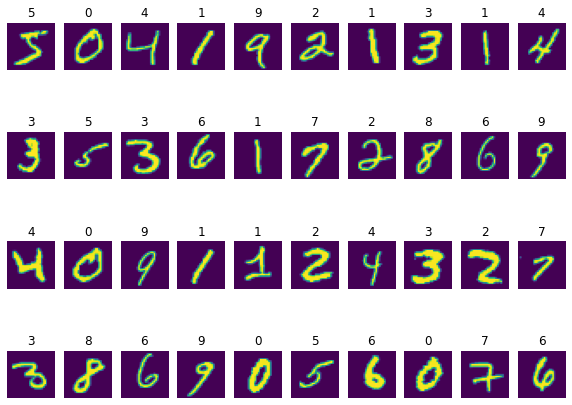

In [6]:
plt.figure(figsize=(10,80))
for i in range (0,40):
    plt.subplot(40,10,i+1)
    img1=X_train[i].reshape(28,28)
    plt.imshow(img1)
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [7]:
#function for loading dataset.
def data_resizing(old_images,img_size=(32,32)):
    old_images=old_images.reshape(old_images.shape[0],28,28)
    all_images=[]
    for img in old_images:
        image=cv2.resize(img,img_size,interpolation=cv2.INTER_CUBIC)# resizing the image to 224*224*3
        all_images.append(image)
    all_images=np.array(all_images)
    return all_images.reshape(all_images.shape[0],all_images.shape[1],all_images.shape[2],1)

In [8]:
train_X=data_resizing(X_train,img_size=(32,32))
test_X=data_resizing(X_test,img_size=(32,32))

print('X_train shape:',train_X.shape)
print('X_test shape:',test_X.shape)

X_train shape: (60000, 32, 32, 1)
X_test shape: (10000, 32, 32, 1)


In [9]:
train_y=to_categorical(y_train,num_classes)
test_y=to_categorical(y_test,num_classes)



print('y_train shape:',train_y.shape)
print('y_test shape:',test_y.shape)

y_train shape: (60000, 10)
y_test shape: (10000, 10)


## Classification Method:

### VGG:

In [10]:
def VGG_16(num_classes,img_size=(32,32,1)):
    initial_model: Model = VGG16(include_top=False, weights=None,input_shape=img_size)

    x = layers.Flatten()(initial_model.output)
    x = layers.Dense(256, activation='relu')(x)
    predictions = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(initial_model.input, predictions)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [11]:
VGG_model=VGG_16(num_classes,img_size=(32,32,1))
VGG_model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0  

In [12]:
def get_callbacks_list():
    """Get callbacks for a model"""
    return [keras.callbacks.EarlyStopping(monitor='val_acc',patience=10),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=5)]

In [13]:
history_vgg = VGG_model.fit(train_X,train_y,batch_size=256,epochs = 200,callbacks=get_callbacks_list(),validation_split=0.1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 [==============================] - 57s 1ms/step - loss: 0.8895 - acc: 0.7351 - val_loss: 0.0739 - val_acc: 0.9798
Epoch 2/200
54000/54000 [==============================] - 49s 915us/step - loss: 0.0739 - acc: 0.9797 - val_loss: 0.0520 - val_acc: 0.9848
Epoch 3/200
54000/54000 [==============================] - 50s 918us/step - loss: 0.0511 - acc: 0.9861 - val_loss: 0.0538 - val_acc: 0.9855
Epoch 4/200
54000/54000 [==============================] - 50s 919us/step - loss: 0.0410 - acc: 0.9890 - val_loss: 0.0321 - val_acc: 0.9907
Epoch 5/200
54000/54000 [==============================] - 50s 920us/step - loss: 0.0373 - acc: 0.9902 - val_loss: 0.0528 - val_acc: 0.9882
Epoch 6/200
54000/54000 [==============================] - 50s 923us/step - loss: 0.0373 - acc: 0.9910 - val_loss: 0.0378 - val_acc: 0.9908
Epoch 7/200
54000/54000 [==============================] - 50s 922us/step - loss: 0.0293 - acc: 0.9925 - val_los

1050

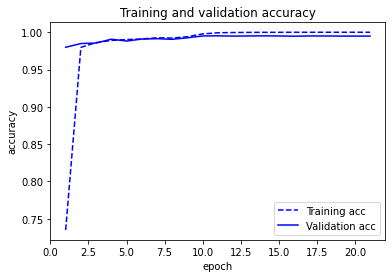

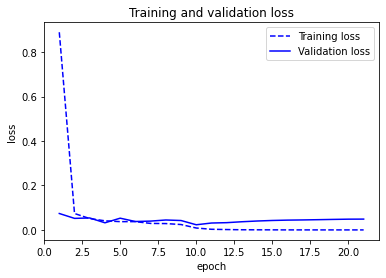

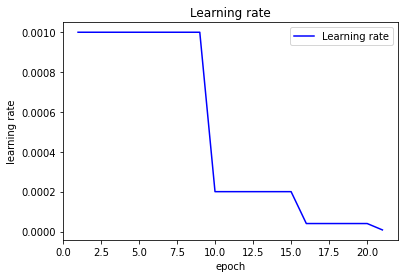

In [48]:
def draw_training_info_plots(_history):
    """Draw loss graphs at the training and validation stage"""
    acc = _history.history['acc']
    val_acc = _history.history['val_acc']
    loss = _history.history['loss']
    val_loss = _history.history['val_loss']

    epochs_plot = range(1, len(acc) + 1)
    plt.plot(epochs_plot, acc, 'b--', label='Training acc')
    plt.plot(epochs_plot, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs_plot, loss, 'b--', label='Training loss')
    plt.plot(epochs_plot, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

    if 'lr' in _history.history:
        learning_rate = _history.history['lr']
        plt.plot(epochs_plot, learning_rate, 'b', label='Learning rate')
        plt.title('Learning rate')
        plt.xlabel('epoch')
        plt.ylabel('learning rate')
        plt.legend()
        plt.show()
    return

draw_training_info_plots(history_vgg)

In [37]:
print('Accuracy:',VGG_model.evaluate(test_X,test_y,verbose=0)[1])

Accuracy: 0.9943000078201294


#### Classification Score and Confusion Metric

In [38]:
predictions = VGG_model.predict(test_X)

from sklearn.metrics import classification_report
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, np.argmax(predictions,axis=1)))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      1.00      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [39]:
from sklearn.metrics import confusion_matrix
import pandas as pd
print ("Confusion matrix")
pd.DataFrame(confusion_matrix(y_test,np.argmax(predictions,axis=1)),columns=np.unique(y_test),index=np.unique(y_test))

Confusion matrix


,0,1,2,3,4,5,6,7,8,9
0,975,0,1,0,0,0,2,1,1,0
1,0,1131,2,1,0,0,1,0,0,0
2,1,0,1029,1,0,0,0,1,0,0
3,0,0,0,1007,0,3,0,0,0,0
4,0,1,0,0,973,0,2,0,0,6
5,0,0,0,4,0,887,1,0,0,0
6,2,1,0,0,0,2,952,0,1,0
7,0,1,2,1,0,0,0,1022,0,2
8,1,0,0,1,0,1,0,0,971,0
9,1,0,0,0,5,2,0,4,1,996


In [49]:
VGG_model.save('VGG_model_mnist.h5')

### Resnet:

In [44]:
def Resnet_50(num_classes,img_size=(32,32,1)):
    initial_model: Model = ResNet50(include_top=False, weights=None,input_shape=img_size)

    x = layers.Flatten()(initial_model.output)
    x = layers.Dense(256, activation='relu')(x)
    predictions = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(initial_model.input, predictions)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [45]:
Resnet_model=Resnet_50(num_classes,img_size=(32,32,1))
Resnet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 1)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [46]:
def get_callbacks_list():
    """Get callbacks for a model"""
    return [keras.callbacks.EarlyStopping(monitor='val_acc',patience=10),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=5)]

In [50]:
history_resnet = Resnet_model.fit(train_X,train_y,batch_size=256,epochs = 200,callbacks=get_callbacks_list(),validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 [==============================] - 69s 1ms/step - loss: 0.4080 - acc: 0.8924 - val_loss: 0.5344 - val_acc: 0.8813
Epoch 2/200
54000/54000 [==============================] - 61s 1ms/step - loss: 0.0749 - acc: 0.9782 - val_loss: 0.0847 - val_acc: 0.9735
Epoch 3/200
54000/54000 [==============================] - 61s 1ms/step - loss: 0.0468 - acc: 0.9857 - val_loss: 0.0956 - val_acc: 0.9762
Epoch 4/200
54000/54000 [==============================] - 61s 1ms/step - loss: 0.0322 - acc: 0.9901 - val_loss: 0.0670 - val_acc: 0.9788
Epoch 5/200
54000/54000 [==============================] - 61s 1ms/step - loss: 0.0317 - acc: 0.9902 - val_loss: 0.0778 - val_acc: 0.9785
Epoch 6/200
54000/54000 [==============================] - 61s 1ms/step - loss: 0.0247 - acc: 0.9922 - val_loss: 0.0710 - val_acc: 0.9812
Epoch 7/200
54000/54000 [==============================] - 61s 1ms/step - loss: 0.0229 - acc: 0.9929 - val_loss: 0.0608 - v

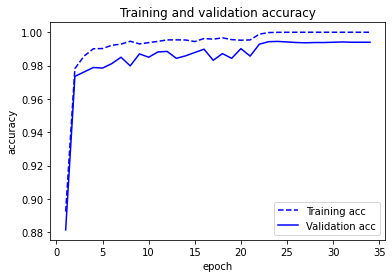

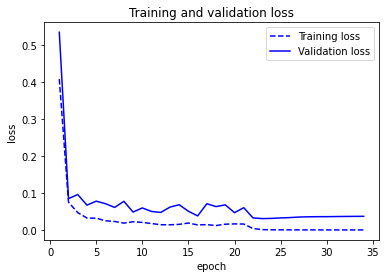

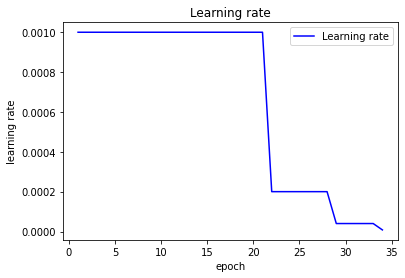

In [51]:
def draw_training_info_plots(_history):
    """Draw loss graphs at the training and validation stage"""
    acc = _history.history['acc']
    val_acc = _history.history['val_acc']
    loss = _history.history['loss']
    val_loss = _history.history['val_loss']

    epochs_plot = range(1, len(acc) + 1)
    plt.plot(epochs_plot, acc, 'b--', label='Training acc')
    plt.plot(epochs_plot, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs_plot, loss, 'b--', label='Training loss')
    plt.plot(epochs_plot, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

    if 'lr' in _history.history:
        learning_rate = _history.history['lr']
        plt.plot(epochs_plot, learning_rate, 'b', label='Learning rate')
        plt.title('Learning rate')
        plt.xlabel('epoch')
        plt.ylabel('learning rate')
        plt.legend()
        plt.show()
    return

draw_training_info_plots(history_resnet)

In [52]:
print('Accuracy:',Resnet_model.evaluate(test_X,test_y,verbose=0)[1])

Accuracy: 0.9934999942779541


#### Classification Score and Confusion Metric

In [53]:
predictions = Resnet_model.predict(test_X)

from sklearn.metrics import classification_report
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, np.argmax(predictions,axis=1)))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [54]:
from sklearn.metrics import confusion_matrix
import pandas as pd
print ("Confusion matrix")
pd.DataFrame(confusion_matrix(y_test,np.argmax(predictions,axis=1)),columns=np.unique(y_test),index=np.unique(y_test))

Confusion matrix


,0,1,2,3,4,5,6,7,8,9
0,978,0,1,0,0,0,0,1,0,0
1,0,1131,0,0,0,2,0,1,0,1
2,0,1,1027,0,1,0,0,1,2,0
3,0,1,0,1005,0,2,0,0,2,0
4,0,0,0,0,974,0,3,0,0,5
5,0,0,0,7,0,883,1,1,0,0
6,4,2,0,0,1,0,950,0,1,0
7,0,2,2,0,0,0,0,1022,1,1
8,0,1,0,0,0,0,0,1,970,2
9,1,0,0,0,5,4,0,2,2,995


In [56]:
Resnet_model.save('Resnet_model_mnist.h5')